



# CAPABILITY : BASED ON THE MACHINE LEARNING ALGORITHM - DECISION TREE THE CODE WILL BE ABLE TO PREDICT IF A GIVEN FEATURE IS OLD OR NEW. UPON GETTING THE DECISION TREE WE WILL BE ABLE TO FIND CERTAIN KEYWORDS THAT MAKES UP THE WHOLE DECISION OF CLASSIFYING IT AS OLD OR NEW FEATURE


# LIBRARIES NEEDED

In [ ]:
#Importing and installing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
!pip install sklearn
!pip install nltk
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=c4a9296e1efad79778de9edc4b4298f08542562ebc726aba027ac9ea7edbbfeb
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...


# DATA PREPROCESSING


In [ ]:
#Reading the dataset given and extracting data from Jan to Dec except Oct. The resulting object is a dictionary of DataFrames, where each key is a sheet name and each value is a DataFrame containing the data in that sheet.
sheets_to_extract = ['Jan-2022','Feb-2022', 'March-2022', 'April-2022' ,'May-2022', 'June-2022', 'July-2022', 'Aug-2022', 'Sept-2022', 'Nov-2022', 'Dec-2022']
sheets_dict = pd.read_excel('Zoom-features-2022.xlsx', sheet_name=sheets_to_extract)


#Using the Pandas function "concat" to concatenate the values of the dictionary into a single DataFrame named "df." The "ignore_index=True" argument ensures that the resulting DataFrame has a new index instead of retaining the indices of the original sheets.
df = pd.concat(sheets_dict.values(), ignore_index=True)


In [ ]:
#Initializing an empty list - "feature_desc"
feature_desc =[]


#Extracts the values in the "Feature Description" and "Feature Title" column of the "df" DataFrame using the "tolist()" method, and stores them in the "feature_desc" list.

#ASSUMPTION-1 : Assuming only 'Feature Title' and 'Feature Description' are the important and useful columns in the dataset for processing

# combine the two columns into a new column
df['Combined'] =  df['Feature Title'].astype(str) + df['Feature Description'].astype(str)

feature_desc = df["Combined"].tolist();
print("These are the feature descriptions as per the dataset:", feature_desc)

These are the feature descriptions as per the dataset: ['Additional MSI/PLIST/GPO/MDM options: Require client or app authentication when joining a webinar - EnforceAppSignInToJoinForWebinarDisabled by default, this requires the desktop client or mobile app to be signed in to a Zoom account to join any webinars. If the host requires specific authentication, the user joining will have to pass that specific authentication check as well.', 'Additional MSI/PLIST/GPO/MDM options: Require authentication when joining a webinar - EnforceSignInToJoinForWebinarDisabled by default, this requires attendees to be signed in to a Zoom account to join any webinars. Attendees can be signed-in on the web portal when joining through the join URL, or on the desktop client or mobile app directly. If the host requires specific authentication, the user joining will have to pass that specific authentication check as well.', 'Additional MSI/PLIST/GPO/MDM options: Require post-meeting virtual background auto-rev

In [ ]:
#Initializing an empty list - "feature_desc_line"
feature_desc_line = []

"""Looping through each line in the "feature_desc" list using a for loop.
Removing the leading and trailing whitespace from the line using the "strip()" method and assigns the result to the variable "trimmed_each_line."
Checks if the trimmed each line is not an empty string using the truth value of "trimmed_line" as a condition.
If the trimmed each line is not empty, it converts it to lowercase using the "lower()" method and appends it to the "Feature_Desc_Line" list."""

for each_line in feature_desc:
  trimmed_each_line = each_line.strip()
  if (trimmed_each_line) : feature_desc_line.append(trimmed_each_line.lower())



In [ ]:
X= feature_desc_line
print("Total number of features are: ",len(feature_desc_line) )

Total number of features are:  281


In [ ]:
#Importing the "CountVectorizer" class and creating an instance of the CountVectorizer class named "vector"

"""The CountVectorizer class is a text preprocessing tool that converts a collection of text documents into a matrix of token counts, where each row represents a document and each column represents a unique word in the vocabulary, with the cell values representing the count of each word in each document.
The vocabulary is generated by the class by assigning an index to each unique word in the text corpus."""

from sklearn.feature_extraction.text import CountVectorizer

#LIMITATION-1: HERE WE ARE NOT LEMMATIZING THE WORDS THAT WE FOUND USING COUNT VECTORIZER
#LIMITATION-2: LIMITING THE CODE ONLY TO WORDS. WE ARE NOT CONSIDERING ANY PHRASES HERE.

vector = CountVectorizer()

In [ ]:
#The fit method of the CountVectorizer class generates a vocabulary of unique words with their corresponding indices from the given processed text corpus, using the provided input data "X".
vector.fit(X)


CountVectorizer()

In [ ]:
#The vocabulary_ attribute of the CountVectorizer object returns a dictionary containing the unique words of the learned vocabulary and their respective indices, which can be used to analyze the feature matrix or transform new text data in the same format as the training data.
vector.vocabulary_

{'additional': 48,
 'msi': 993,
 'plist': 1156,
 'gpo': 701,
 'mdm': 936,
 'options': 1076,
 'require': 1306,
 'client': 327,
 'or': 1077,
 'app': 99,
 'authentication': 164,
 'when': 1714,
 'joining': 852,
 'webinar': 1704,
 'enforceappsignintojoinforwebinardisabled': 568,
 'by': 244,
 'default': 447,
 'this': 1569,
 'requires': 1310,
 'the': 1559,
 'desktop': 460,
 'mobile': 982,
 'to': 1584,
 'be': 196,
 'signed': 1438,
 'in': 774,
 'zoom': 1750,
 'account': 33,
 'join': 850,
 'any': 96,
 'webinars': 1705,
 'if': 765,
 'host': 748,
 'specific': 1471,
 'user': 1655,
 'will': 1730,
 'have': 723,
 'pass': 1125,
 'that': 1558,
 'check': 313,
 'as': 126,
 'well': 1710,
 'enforcesignintojoinforwebinardisabled': 571,
 'attendees': 142,
 'can': 263,
 'on': 1064,
 'web': 1703,
 'portal': 1168,
 'through': 1572,
 'url': 1647,
 'directly': 483,
 'post': 1169,
 'meeting': 940,
 'virtual': 1682,
 'background': 183,
 'auto': 167,
 'reversal': 1332,
 'enableautoreversevirtualbkgnddisabled': 553,
 

In [ ]:
print("The size of the vocabulary is:", len(vector.vocabulary_))

The size of the vocabulary is: 1752


In [ ]:
#By transforming, we are converting the input text into a matrix of token counts based on the vocabulary learned during the training phase.
document_term_matrix = vector.transform(X)
document_term_matrix.shape
document_term_matrix

<281x1752 sparse matrix of type '<class 'numpy.int64'>'
	with 9028 stored elements in Compressed Sparse Row format>

In [ ]:
#Here we are converting the sparse matrix document_term_matrix to a dense matrix using the toarray method.

"""A sparse matrix is a matrix in which most of the elements are zero. In the case of the bag-of-words matrix,
this means that most of the cell values are zero because most documents do not contain most of the words in the vocabulary.
Converting the sparse matrix to a dense matrix can be useful for some types of analysis, such as clustering or topic modeling."""

#The resulting dense matrix is a two-dimensional numpy array, where each row represents a feature description and each column represents a unique word in the vocabulary. The values in the matrix represent the frequency of each word in each document. The input_array variable is printed, which displays the resulting dense matrix.

feature_arr = document_term_matrix.toarray()
feature_arr


array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])




# APPROACH 2 (INCOMPLETE) ( KEY DECISION -2 )

In [ ]:
#Here we defined some of the new feature action words from the vocabulary we obtained above.

"""
newfeature_action_words = [
'expand', 'enhancement', 'addition', 'optimize', 'update', 'enablement', 'enable', 'allow',
'collaborate', 'supported', 'adaptation', 'adjusted',  'progress',  'supports', 'assigning', 'organize', 'customizable',
'enhancements', 'improved', 'customization','enhance', 'enhanced','introducing']

base_words =[]

for word in newfeature_action_words:
  base_words.append(word)

base_words = list(set(base_words))

print(base_words)

# Loop through each item in list of feature_desc_line. After tokenizing if a word is found to be matched with newfeature_action_words then we label that class as 1. Otherwise 0.
target = []
for item in feature_desc_line:
    # Split the item into individual words
    words = nltk.word_tokenize(item)
    flag = 0
    # Check if each word in list A is present in the words of the item
    for word in base_words:
        if word in words:
            # print(f"{word} is present in {item}")
            flag = 1
    target.append(flag)

print(target)
print(len(target))
"""
# target = [0] * 200


'\nnewfeature_action_words = [\n\'expand\', \'enhancement\', \'addition\', \'optimize\', \'update\', \'enablement\', \'enable\', \'allow\',\n\'collaborate\', \'supported\', \'adaptation\', \'adjusted\',  \'progress\',  \'supports\', \'assigning\', \'organize\', \'customizable\', \n\'enhancements\', \'improved\', \'customization\',\'enhance\', \'enhanced\',\'introducing\']\n\nbase_words =[]\n\nfor word in newfeature_action_words:\n  base_words.append(word)\n  \nbase_words = list(set(base_words))\n\nprint(base_words)\n\n# Loop through each item in list of feature_desc_line. After tokenizing if a word is found to be matched with newfeature_action_words then we label that class as 1. Otherwise 0.\ntarget = []\nfor item in feature_desc_line:\n    # Split the item into individual words\n    words = nltk.word_tokenize(item)\n    flag = 0\n    # Check if each word in list A is present in the words of the item\n    for word in base_words:\n        if word in words:\n            # print(f"{word}

# APPROACH - 1 : CLASS LABELLING , DATA SPLITTING, DECISION TREE ALGORITHM IMPLEMENTATION ( KEY DECISION - 1)

In [ ]:
#Here we are working on the data in such a way that, we consider consecutive months of data as old features as well as new features. We can check that in the below ouput statements. So that we can find out for which months of data the accuracy is good!
feature_size = [14,5,40,31,17,32,21,24,26,29,42]

#ASSUMPTION:2 : Here we are considering consequtive series of months as both old and new data.

feature_size_months=['Jan-2022','Feb-2022', 'March-2022', 'April-2022' ,'May-2022', 'June-2022', 'July-2022', 'Aug-2022', 'Sept-2022', 'Nov-2022', 'Dec-2022']
sum = 0
for i in range(0, 11):
    sum = sum + feature_size[i]
    tsum = sum
    for j in range(i + 1, 11):
          tsum = tsum + feature_size[j]
          target = [0] * tsum
          k = sum
          while k < tsum:
              target[k] = 1
              k = k + 1
          #Using train_test_split function from scikit-learn to split the feature array (feature_arr) and the class labels (target_label) into training and testing sets.
          '''The testing set size is set to 33% of the total data, and a random state of 42 is used to ensure reproducibility.'''
          X_train, X_test, y_train, y_test = train_test_split(feature_arr[0:tsum], target, test_size =0.33, random_state= 42)
          #DECISION TREE CLASSIFIER
          """The criterion parameter is set to "gini", which indicates that the Gini index should be used as the impurity measure to split the tree.
          The max_depth parameter is set to 4, which limits the depth of the tree to prevent overfitting.
          The classifier is trained on the training data using the fit method."""
          dtclf_gini = DecisionTreeClassifier(criterion= "gini", max_depth = 4, random_state=0)
          dtclf_gini.fit(X_train, y_train)
          #The predict method of the classifier is then used to predict the class labels of the testing data (X_test), and the resulting predictions are stored in the y_pred_gini variable.
          y_pred_gini = dtclf_gini.predict(X_test)
          y_pred_gini
          print("Old Features considered from ", feature_size_months[0] , "to ", feature_size_months[i],
                "New features considered from", feature_size_months[i+1],"to", feature_size_months[j])
          #print("Target is: ", target)
          #accuracy_score function is used to compute the accuracy of the classifier on the testing data
          print('Accuracy score is : {0:5.4F}'.format(accuracy_score(y_test, y_pred_gini)))
          '''Here we are producing a graphical representation of the decision tree'''
          #plt.figure(figsize=(12,6))
          #tree.plot_tree(dtclf_gini.fit(X_train, y_train),max_depth=4,class_names=True,filled=True)



Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to Feb-2022
Accuracy score is : 0.5714
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to March-2022
Accuracy score is : 0.7500
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to April-2022
Accuracy score is : 0.9000
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to May-2022
Accuracy score is : 0.7500
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to June-2022
Accuracy score is : 0.9130
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to July-2022
Accuracy score is : 0.9245
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 to Aug-2022
Accuracy score is : 0.8852
Old Features considered from  Jan-2022 to  Jan-2022 New features considered from Feb-2022 t

# DECIDING ON BEST DATASET AND ITS IMPLEMENTATION WITH TREE



In [ ]:
# As per the above accuracies, we found that

# Old Features considered from  Jan-2022 to  Aug-2022 New features considered from Sept-2022 to Nov-2022 has significant accuracy compared to the other data.
# Here we have old features data of Jan-2022 to Aug-2022 (i.e) 8 months of data
# New features of Sept-2022 to Nov-2022 (i.e) 2 months of data
# There's a good balance of old and new features to the algorithm.
#Accuracy score is : 0.7848

#Implementing the algorithm again so that we can plot the decision tree

'''target = [0] * 239
k = 184
while k < 239:
    target[k] = 1
    k = k + 1

X_train, X_test, y_train, y_test = train_test_split(feature_arr[0:239], target, test_size =0.33, random_state= 42)
dtclf_gini = DecisionTreeClassifier(criterion= "gini", max_depth = 4, random_state=0)
dtclf_gini.fit(X_train, y_train)
#The predict method of the classifier is then used to predict the class labels of the testing data (X_test), and the resulting predictions are stored in the y_pred_gini variable.
y_pred_gini = dtclf_gini.predict(X_test)
y_pred_gini
print('Accuracy score is : {0:5.4F}'.format(accuracy_score(y_test, y_pred_gini)))
#Here we are producing a graphical representation of the decision tree
plt.figure(figsize=(12,6))
tree.plot_tree(dtclf_gini.fit(X_train, y_train),max_depth=4,class_names=True,filled=True)'''


'target = [0] * 239\nk = 184\nwhile k < 239:\n    target[k] = 1\n    k = k + 1\n\nX_train, X_test, y_train, y_test = train_test_split(feature_arr[0:239], target, test_size =0.33, random_state= 42) \ndtclf_gini = DecisionTreeClassifier(criterion= "gini", max_depth = 4, random_state=0) \ndtclf_gini.fit(X_train, y_train)\n#The predict method of the classifier is then used to predict the class labels of the testing data (X_test), and the resulting predictions are stored in the y_pred_gini variable.\ny_pred_gini = dtclf_gini.predict(X_test) \ny_pred_gini\nprint(\'Accuracy score is : {0:5.4F}\'.format(accuracy_score(y_test, y_pred_gini)))\n#Here we are producing a graphical representation of the decision tree\nplt.figure(figsize=(12,6)) \ntree.plot_tree(dtclf_gini.fit(X_train, y_train),max_depth=4,class_names=True,filled=True)'

Accuracy score is : 0.8354


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[Text(0.6538461538461539, 0.9, 'x[1550] <= 0.5\ngini = 0.356\nsamples = 160\nvalue = [123, 37]\nclass = y[0]'),
 Text(0.5769230769230769, 0.7, 'x[460] <= 0.5\ngini = 0.322\nsamples = 154\nvalue = [123, 31]\nclass = y[0]'),
 Text(0.3076923076923077, 0.5, 'x[1189] <= 0.5\ngini = 0.27\nsamples = 137\nvalue = [115, 22]\nclass = y[0]'),
 Text(0.15384615384615385, 0.3, 'x[1302] <= 1.0\ngini = 0.229\nsamples = 129\nvalue = [112, 17]\nclass = y[0]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.208\nsamples = 127\nvalue = [112, 15]\nclass = y[0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(0.46153846153846156, 0.3, 'x[549] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = y[1]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = y[1]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'),
 Text(0.8461538461538461, 0.5, 'x[666] <= 0.5\ngini = 0.498\nsamples = 17\nval

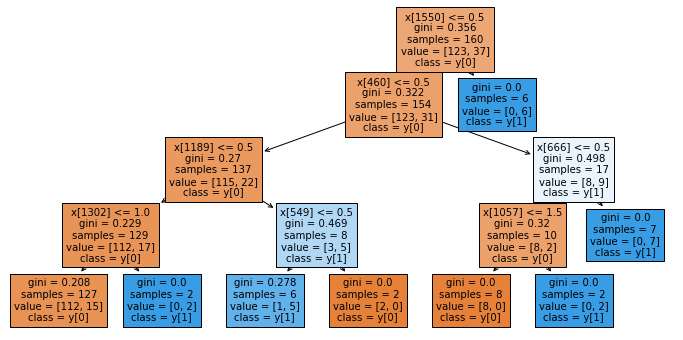

In [ ]:
# As per the above accuracies, we found that

# Old Features considered from  Jan-2022 to  Aug-2022 New features considered from Sept-2022 to Nov-2022 has significant accuracy compared to the other data.
# Here we have old features data of Jan-2022 to Aug-2022 (i.e) 8 months of data
# New features of Sept-2022 to Nov-2022 (i.e) 2 months of data
# There's a good balance of old and new features to the algorithm.
#Accuracy score is : 0.8354

#Implementing the algorithm again so that we can plot the decision tree
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

#K-Fold Classifier

'''KFold is used for dividing the dataset into k equal sized folds, where each fold is used once as a validation set while the k-1 remaining folds are used for training.
   n_splits is used to specify the specifies the number of folds to create.
   In this case, n_splits=5, indicating that the dataset will be divided into 5 folds or subsets.'''
kf = KFold(n_splits=5)

# Perform hyperparameter tuning using GridSearchCV
# max_depth refers to the maximum depth of the decision tree model, which determines the number of nodes and splits in the tree.
# min_samples_split is the minimum number of samples required to split an internal node.
# min_samples_leaf is the minimum number of samples required to be at a leaf node.
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [6, 7, 8, 9],
    'min_samples_leaf': [3, 4, 5]
}
target = [0] * 239
k = 184
while k < 239:
    target[k] = 1
    k = k + 1

#GridSearchCV class is a method for performing an exhaustive search over specified parameter values for an estimator.
#It takes as input an estimator, a parameter grid to explore, a cross-validation scheme, and a scoring metric to evaluate the performance of different parameter combinations.
grid_search = GridSearchCV(estimator=dtclf_gini, param_grid=param_grid, cv=kf, scoring='accuracy')

X_train, X_test, y_train, y_test = train_test_split(feature_arr[0:239], target, test_size =0.33, random_state= 42)
grid_search.fit(X_train, y_train)
best_clf = grid_search.best_estimator_

# Bagging Classifier

'''A method to  that combines multiple base estimators (also known as weak learners) to improve the overall performance of the model.
base_estimator: The base estimator that is used to fit on the bootstrap samples. In this case, best_clf is the best estimator found during the grid search, which is obtained from a decision tree classifier.
n_estimators: The number of base estimators to use in the ensemble. '''
bagging_clf = BaggingClassifier(base_estimator=best_clf, n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

#The predict method of the classifier is then used to predict the class labels of the testing data (X_test), and the resulting predictions are stored in the y_pred variable.
y_pred = bagging_clf.predict(X_test)

#Accuracy score
print('Accuracy score is : {0:5.4F}'.format(accuracy_score(y_test, y_pred)))

#Here we are generating a graphical representation of the decision tree
plt.figure(figsize=(12,6))
tree.plot_tree(dtclf_gini.fit(X_train, y_train),max_depth=4,class_names=True,filled=True)

In [ ]:
print(vector.get_feature_names_out()[1550])
print(vector.get_feature_names_out()[460])
print(vector.get_feature_names_out()[1189])
print(vector.get_feature_names_out()[1302])
print(vector.get_feature_names_out()[549])
print(vector.get_feature_names_out()[666])
print(vector.get_feature_names_out()[1057])

team
desktop
previously
request
enable
for
of


In [ ]:
from sklearn.tree import export_text
feature_text=export_text(dtclf_gini)
print(feature_text)

|--- feature_1550 <= 0.50
|   |--- feature_460 <= 0.50
|   |   |--- feature_1189 <= 0.50
|   |   |   |--- feature_1302 <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1302 >  1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_1189 >  0.50
|   |   |   |--- feature_549 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_549 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_460 >  0.50
|   |   |--- feature_666 <= 0.50
|   |   |   |--- feature_1057 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1057 >  1.50
|   |   |   |   |--- class: 1
|   |   |--- feature_666 >  0.50
|   |   |   |--- class: 1
|--- feature_1550 >  0.50
|   |--- class: 1



# SOFTWARE TESTING

In [ ]:
#TEST-1
new_feature_desc = "Hide/display chat preview notifications"
trimmed_desc = new_feature_desc.strip().lower()


In [ ]:
new_feature_bow = vector.transform([trimmed_desc])
print(new_feature_bow)


  (0, 304)	1
  (0, 496)	1
  (0, 739)	1
  (0, 1027)	1
  (0, 1185)	1


In [ ]:
prediction = dtclf_gini.predict(new_feature_bow)
print(prediction)

[0]


In [ ]:
#TEST-2
new_feature_desc = "Scheduling a meeting through Zoom Team Chat"
trimmed_desc = new_feature_desc.strip().lower()
new_feature_bow = vector.transform([trimmed_desc])
print(new_feature_bow)


  (0, 304)	1
  (0, 940)	1
  (0, 1365)	1
  (0, 1550)	1
  (0, 1572)	1
  (0, 1750)	1


In [ ]:
prediction = dtclf_gini.predict(new_feature_bow)
print(prediction)

[1]


In [ ]:
#TEST-3
new_feature_desc = "Language Interpretation relay enhancement"
trimmed_desc = new_feature_desc.strip().lower()
new_feature_bow = vector.transform([trimmed_desc])
print(new_feature_bow)

  (0, 583)	1
  (0, 828)	1
  (0, 866)	1
  (0, 1282)	1


In [ ]:
prediction = dtclf_gini.predict(new_feature_bow)
print(prediction)

[1]
